## Inicialização

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import *
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_bloch_vector
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector
import math
from qiskit.qasm3 import *
from qiskit.quantum_info import state_fidelity
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_qsphere
from qiskit import transpile
from qiskit.visualization import plot_state_city, plot_histogram
from pylatexenc import *
from qiskit.quantum_info import Operator
from qiskit.quantum_info import Statevector
from qiskit import *

In [2]:
!pip install --upgrade qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 6.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: qiskit
    Found existing installation: qiskit 2.1.0
    Uninstalling qiskit-2.1.0:
      Successfully uninstalled qiskit-2.1.0


In [3]:
import qiskit
print(qiskit.version.get_version_info())
qiskit.__version__

2.1.0


'2.1.0'

#### Um QUBIT é o equivalente de um BIT na computação clássica, mas ao contrário de um BIT, que só pode assumir dois estados, o computador quantico permite multiplos estados (infinitos estados).

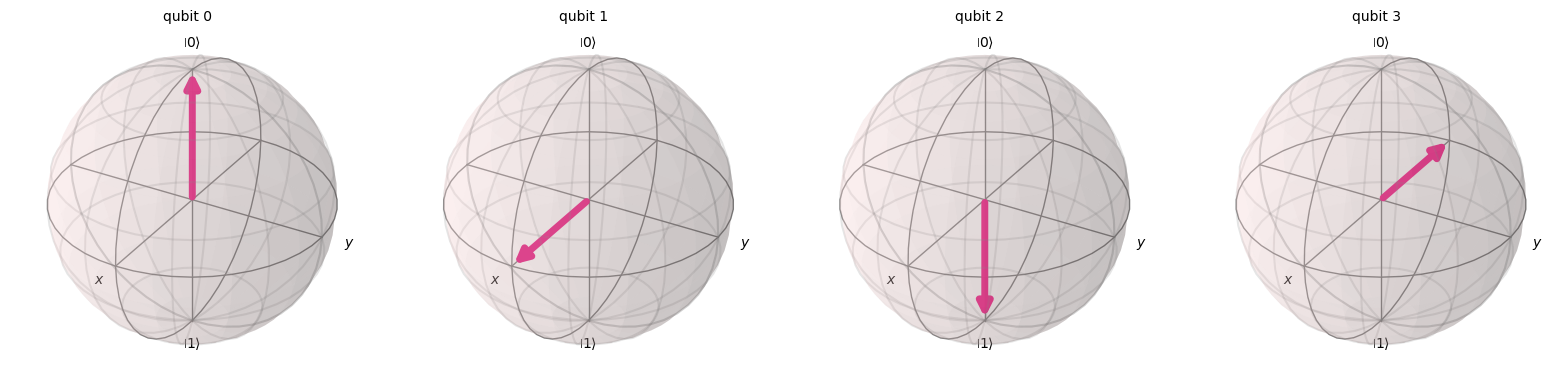

In [4]:
qc = QuantumCircuit(4)
qc.h(1)
qc.x(2)
qc.x(3)
qc.h(3)

#qc.rx(math.pi / 4, 0)
#qc.ry(math.pi / 2, 0)
#qc.h(0)
#qc.h(2)
#qc.rx(math.pi / 4 , 0)
#qc.rz(math.pi /2, 0)
#qc.ry(math.pi / 2, 0)
#qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})
#qc.rz(math.pi, 0 )
#qc.rz(math.pi, 0 )
plot_bloch_multivector(qc)

#### Cada uma das instruções permite uma rotação em um dos eixos. Temos instruções para rotação nos eixos X, Y e Z

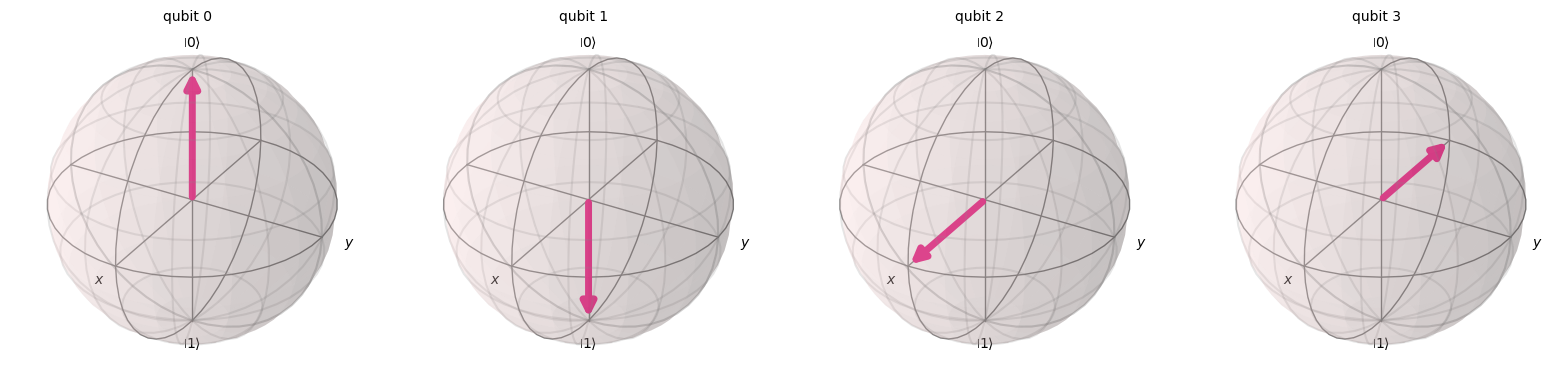

In [5]:
qc = QuantumCircuit(4) 
qc.x(1)
qc.h(2)
qc.x(3)
qc.h(3)
#qc.rx(math.pi / 2, 0)
#qc.rz(3 * math.pi/2, 0)
plot_bloch_multivector(qc)

### Um circuito em hadamard tem iguais probabilidades de gerar um resultado 0 ou resultado 1

In [6]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumCircuit

circ = QuantumCircuit(1,1)
circ.h(0)
circ.measure_all()

simulator = BasicSimulator()
result = simulator.run(circ).result()
counts = result.get_counts()
print(counts)

{'0 0': 518, '1 0': 506}


In [7]:
from qiskit import *
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumCircuit

q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)
qc.x(q)
qc.measure_all()

simulator = BasicSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)

{'1 0': 1024}


#### Quando lemos um QUBIT, ele retorna para um dos estados estáveis, que na lógica booleana é ZERO ou UM, a probabilidade é maior de ser ZERO quanto mais próximo da parte superior da esfera, e maior de ser 1 quanto mais próximo da parte inferior da esfera.

In [8]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumCircuit

circ = QuantumCircuit(1)
#qc.ry(math.pi /2, 0)
circ.h(0)
qc.rz(math.pi / 4, 0 )
circ.measure_all()

simulator = BasicSimulator()
result = simulator.run(circ).result()
counts = result.get_counts()
print(counts)

{'0': 495, '1': 529}


#### Inicialmente o estado de um QUBIT é Zero, e temos instruções para invertê-lo e torná-lo UM.

In [8]:
qc = QuantumCircuit(1,1)   
qc.x(0)                     
qc.measure_all()

simulator = BasicSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)

{'1 0': 1024}


#### O Computador quantico trabalha em cooperação com um computador tradicional. Podemos transformar um QUBIT para CBIT (Classical BIT) para fazer algum processamento adicional no computador clássico

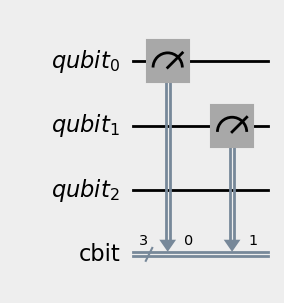

In [9]:
q = QuantumRegister(3, name="qubit")
c = ClassicalRegister(3, name="cbit")
qc = QuantumCircuit(q, c)
qc.measure([0,1], [0,1])
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

#### Como o CBIT só pode ter os valores zero e um, quando convertidos a partir de um QUBIT assumem a probabilidade mais próxima de serem ZERO ou UM.

No measurements in circuit "circuit-173", classical register will remain all zeros.


{'00': 1024}


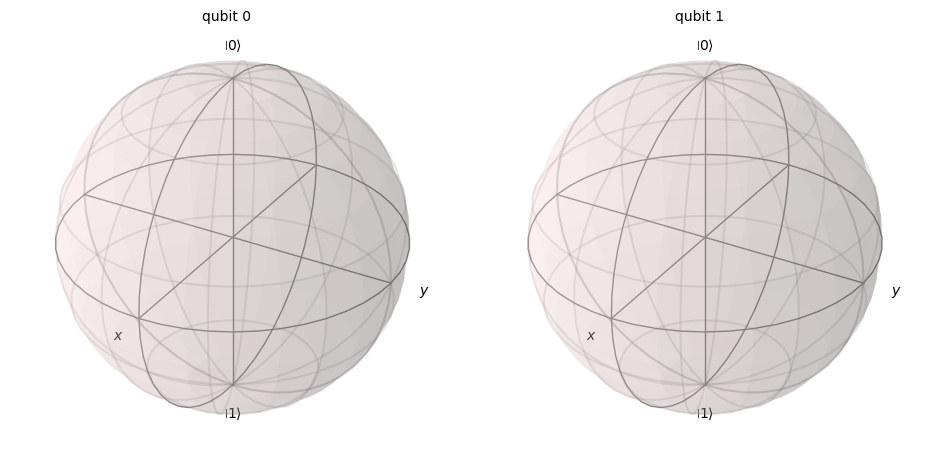

In [10]:
qc = QuantumCircuit(2, 2)   
#qc.rz(math.pi /2, 0)                        
qc.h(0)
qc.cx(0, 1)
#qc.measure_all()

simulator = BasicSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()


print(counts)
plot_bloch_multivector(qc)
#qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})


#### Um conceito importante da computação quantica é o da superposição. A superposição nos permite criar um estado especial, que tem iguais probabilidades de se tornar ZERO ou UM. Funciona como um gerador de números randômicos de um único BIT. Existe um operador especial chamado de hadamard, que transforma o QUBIT para este estado especial

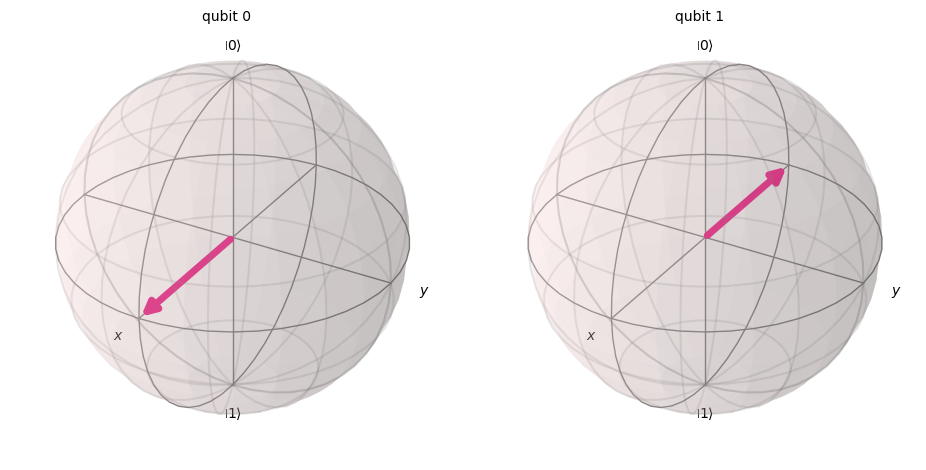

In [11]:
qc = QuantumCircuit(2)  
qc.x(1)
qc.h(0)   
qc.h(1)

#simulator = BasicSimulator()
#result = simulator.run(qc).result()
#counts = result.get_counts()

#print(counts)
plot_bloch_multivector(qc)

#### Outro conceito importante do QUBIT é o do emaranhamento ou entrelaçamento. Podemos "conectar" dois QUBITs de forma que eles passem e ter seus valores correlacionados. Quando um QUBIT se modifica, o outro se modifica de forma complementar. Por exemplo, este circuito a seguir cria dois QUBITs conectados. Quando o valor do QUBIT 0 é igual a 1, ele inverte o valor de QUBIT 1. Se ele for Zero, o valor de QUBIT 1 não é alterado.

{'000 000': 1024}


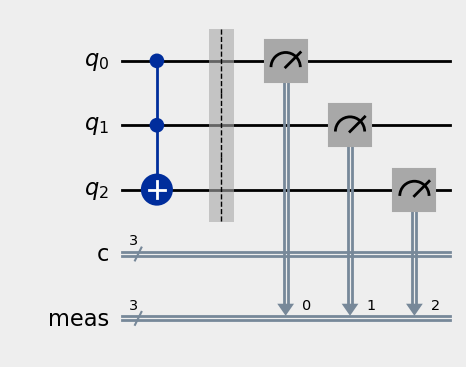

In [12]:
qc = QuantumCircuit(3,3)  
qc.ccx(0, 1, 2)
qc.measure_all()
simulator = BasicSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

#### Para que consideremos emaranhados, os dois precisam se alterar ao mesmo tempo. O circuito anterior não está emaranhado, porque se o valor de q0 for ZERO, q1 pode ser Zero ou Um. Um exemplo de entrelaçamento pode ser 

{'000 000': 535, '111 000': 489}


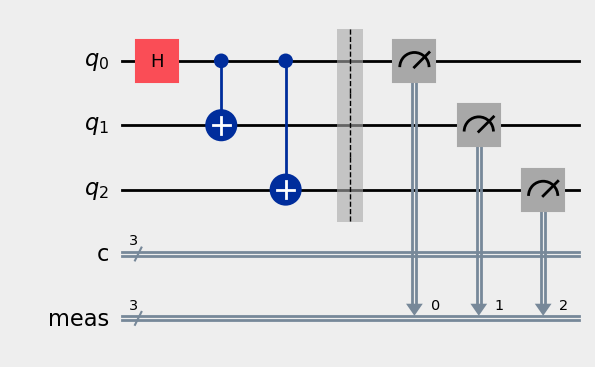

In [13]:
qc = QuantumCircuit(3,3) 
qc.h(0)
qc.cx(0, 1)
qc.cx(0,2)
qc.measure_all()
simulator = BasicSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

#### As portas lógicas tradicionais podem ser simuladas por operadores lógicos da computação quântica. Por exemplo, uma porta AND seguida de uma porta XOR, como a imagem da direita, pode ser criada pelo circuito abaixo

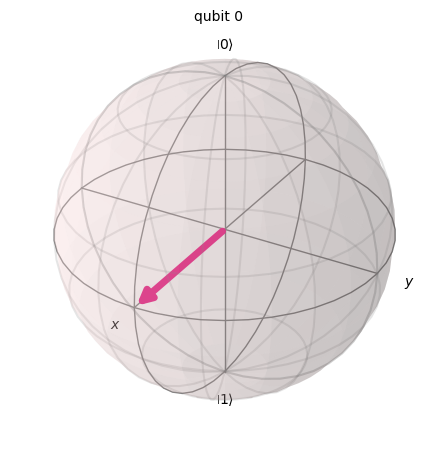

In [14]:
qc = QuantumCircuit(1) 
qc.h(0)
#qc.ccx(0,1,2)
qc.x(0)
#qc.h(0)
#qc.measure_all()
#simulator = BasicSimulator()
#result = simulator.run(qc).result()
#counts = result.get_counts()
#print(counts)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})
plot_bloch_multivector(qc)

#### A topologia dos computadores pode variar, e a tecnologia do QISKIT permite que diversas topologias de construção de computadores quanticos sejam criados. Isto torna o software adequado para as gerações atuais e futuras de computadores quanticos

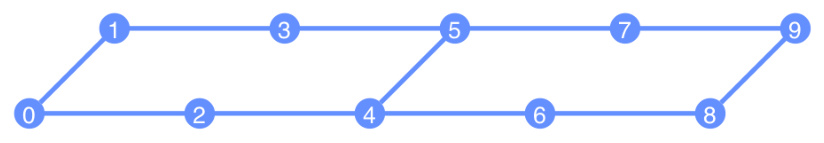

In [15]:
from qiskit.visualization import plot_coupling_map
num_qubits = 10

coupling_map = [[0,1],[1,3],[0,2],[2,4],[4,6], [6,8], [3,5], [5,7],[7,9], [4,5], [8,9]]  
# conexões entre os QUBITS
qubit_coordinates = [[0,1], [1, 2], [0, 3], [1, 4], [0,5], [1,6], [0,7], [1,8], [0,9], [1,10]]   
# camadas
plot_coupling_map(num_qubits, qubit_coordinates, coupling_map)

#### Nem todas as instruções podem ser executadas por todos os computadores. Algumas vezes precisamos "decompor" instruções mais complexas em instruções mais simples, tornando a execução mais simples em um computador quantico.

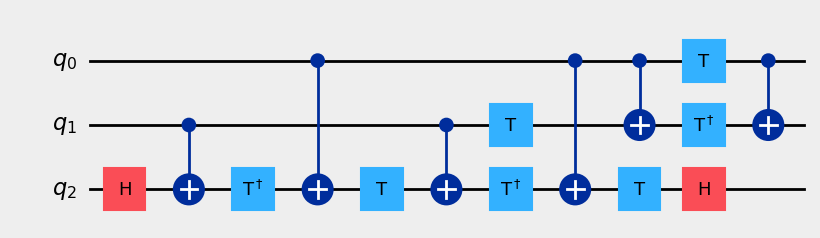

In [16]:
qc = QuantumCircuit (3)
qc.ccx (0,1,2)
qc.decompose().draw (output='mpl', style={'backgroundcolor': '#EEEEEE'}) #D - OK, BUT DECOMPOSE


#### Podemos agrupar elementos em um circuito, de forma 

2


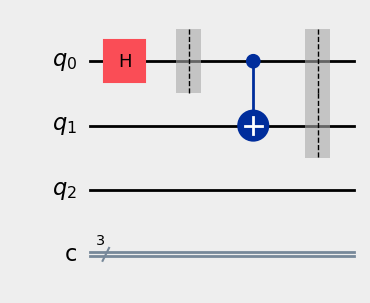

In [17]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_multivector

qc = QuantumCircuit(3, 3)
qc.h(0)
qc.barrier(0)
qc.cx(0,1)
qc.barrier([0,1])
depth = qc.depth()
print(depth)
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

#### Os códigos em QSIKIT são convertidos no ASSEMBLER verdadeiro do computador quantico, que é a linguagem QASM. 

In [18]:
from qiskit.qasm3 import *
from qiskit.qasm3 import dumps
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.x(0)

print(dumps(qc))

OPENQASM 3.0;
include "stdgates.inc";
bit[1] c;
qubit[1] q;
h q[0];
x q[0];



#### Também podemos criar circuitos a partir de um código em QASM

{'000': 534, '111': 490}


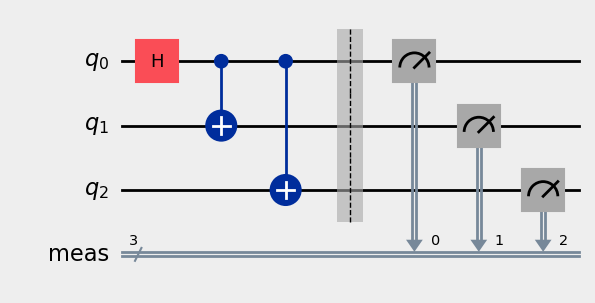

In [19]:
qasm_str = """OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
h q[0];
cx q[0],q[1];
cx q[0],q[2];
"""
# program = """
#     OPENQASM 3.0;
#     include "stdgates.inc";
 
#     input float[64] a;
#     qubit[3] q;
#     bit[2] mid;
#     bit[3] out;
 
#     let aliased = q[0:1];
 
#     gate my_gate(a) c, t {
#       gphase(a / 2);
#       ry(a) c;
#       cx c, t;
#     }
#     gate my_phase(a) c {
#       ctrl @ inv @ gphase(a) c;
#     }
 
#     my_gate(a * 2) aliased[0], q[{1, 2}][0];
#     measure q[0] -> mid[0];
#     measure q[1] -> mid[1];
 
#     while (mid == "00") {
#       reset q[0];
#       reset q[1];
#       my_gate(a) q[0], q[1];
#       my_phase(a - pi/2) q[1];
#       mid[0] = measure q[0];
#       mid[1] = measure q[1];
#     }
 
#     if (mid[0]) {
#       let inner_alias = q[{0, 1}];
#       reset inner_alias;
#     }
 
#     out = measure q;
# """


qc = QuantumCircuit.from_qasm_str(qasm_str)
qc.measure_all()
simulator = BasicSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

#### Podemos programar dinamicamente algorítmos, criando circuitos de acordo com alguma logica, tornando os códigos em QISKIT mais ricos

In [20]:
qreg = QuantumRegister(2)
creg = ClassicalRegister(2)
qc = QuantumCircuit(qreg, creg)
with qc.switch(creg) as case:
    with case(0):
        qc.x(0)
    with case(1):
        qc.x(1)

qasm_string = qasm3.dumps(qc, experimental=qasm3.ExperimentalFeatures.SWITCH_CASE_V1)
print(qasm_string)

NameError: name 'qasm3' is not defined

#### Para que possamos fazer experiências com os QUBITs, temos que ser capazes de fazer medidas e retirar métricas. PAra isto, diversos tipos de gráficos estão disponíveis. Temos gráficos visuais que representam os QUBITs em esferas, cada um em seu gráfico separado, ou podemos representar um mapa de estados com todos os QUBITS em um gráfico apenas 

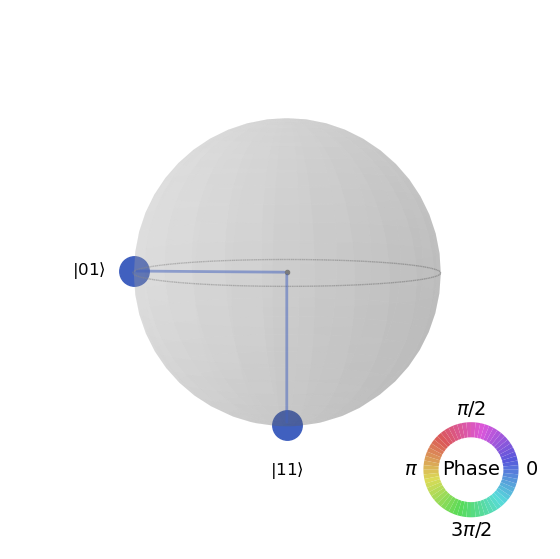

In [21]:
qc = QuantumCircuit(2)   
qc.ry(math.pi, 0)
qc.h(1)

matrix = DensityMatrix(qc)
plot_state_qsphere(matrix, show_state_phases = False, use_degrees = False)

#### Também podemos gerar gráficos de histograma, que nos mostra a distribuição dos QUBITS para uma dada execução

In [22]:
qc = QuantumCircuit(2,2)
#qc.h(0)
#qc.h(1)
qc.cx(0,1)
#qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})
display(Operator.from_circuit(qc).draw("latex"))

<IPython.core.display.Latex object>

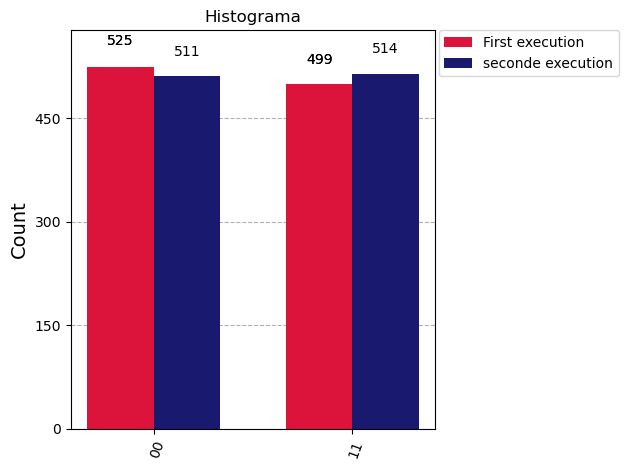

In [23]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.h(1)
qc.cx(0,1)

circ.measure_all()

simulator = BasicSimulator()
result = simulator.run(circ).result()
counts = result.get_counts()

counts1 = {'00': 525, '11': 499}
counts2 = {'00': 511, '11': 514}
 
legend = ['First execution', 'seconde execution']
 
#plot_histogram([counts], legend=legend, color=['crimson'],  title="Histograma")
plot_histogram([counts1, counts2], legend=legend, color=['crimson', 'midnightblue'], title="Histograma")

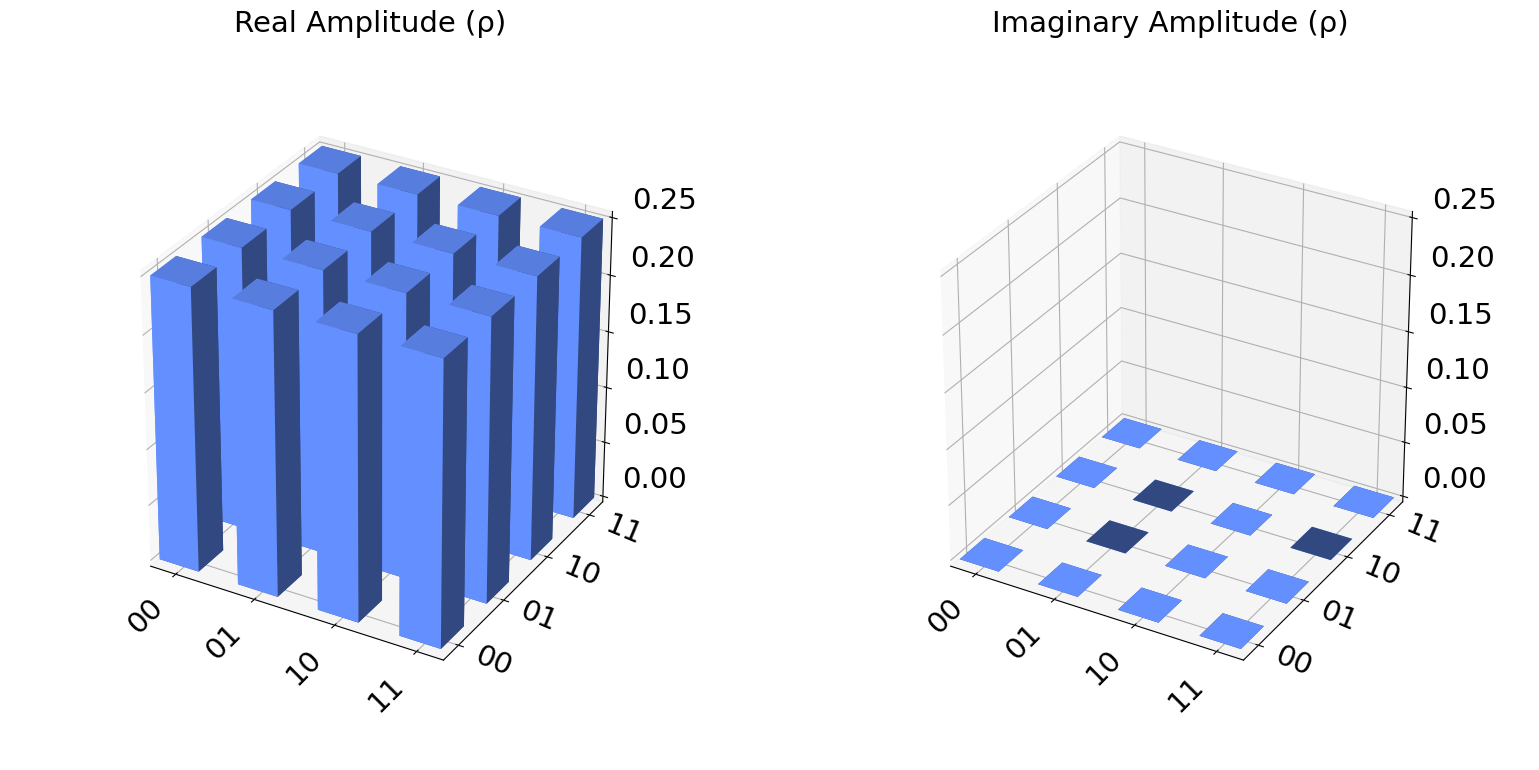

In [24]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.h(1)
qc.cx(0,1)

qc.remove_final_measurements()  
statevector = Statevector(qc)
plot_state_city(statevector)

#### Estados também podem ser impressos e analisados

In [25]:
from qiskit import QuantumCircuit
from math import sqrt
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(1)
qc.h(0)
# qc.h(1)
# qc.cx(1, 2)
qc.measure_all()  

qc.remove_final_measurements()  
statevector = Statevector(qc)
print(statevector)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


##### Common Gates
GATE | rotation | name |
--- | --- | ---- |
qc.h | X+Z (pi) | hadamard (no angle) |
qc.i,qc.id | 0 | identity (no effect) |
qc.p | Z (∅) | Phase (change Phase - rotate Z Axis) |
qc.rx | X (∅) | RX  (need angle) | 
qc.ry | Y (∅) | RY  (need angle) | 
qc.rz | Z (∅) | RZ  (need angle) | 
qc.s | Z (PI/2) | same as p(PI/2, gate) | 
qc.sdg | Z (3PI/2) | same as p(3PI/2, gate) | 
qc.sx | X (PI/2) | same as rx(PI/2, gate) | 
qc.t | Z (PI/4) | same as p(PI/4, gate) | 
qc.tdg | Z (7PI/4) | same as p(7PI/4, gate) | 
qc.u | Y,Z,Z | Apply 3 angles to QUBIT (Y,Z,Z) this order  | 
qc.x | X | same as rx(PI, gate) | 
qc.y | Y | same as ry(PI, gate) | 
qc.z | z | same as rz(PI, gate) | 
###### MultiGates
GATE | rotation | name | 
--- | --- | ---- |
qc.ccx | X | X rotate controled by 2 QUBITs (no angle) - AKA TOFFOLI | 
qc.c3sx | sx | X rotate controled by 3 QUBITs (angle) | 
qc.c4sx | x | X rotate controled by 4 QUBITs (no angle) | 
qc.ch | H | Aply hadamard accoring control gate (no angle) | 
qc.cp | Y | Apply phase (Z) with angle controlled | 
qc.crx | X | rotate X with provided angle controled | 
qc.cry | Y | rotate Y with provided angle (same as TOFFOLI) | 
qc.crzb | Z | rotate Z with provided angle | 
qc.cswap | swap | swap two controled qubits | 
qc.csx | sx | pi/2 (square root) controled | 
qc.cu  | Y,Z,Z  | U controled | 
qc.cx,qc.cnot | X | Apply x controled (inversor) | 
qc.cy | Y | Apply y controled | 
qc.cz | Z | Apply z controled | 
qc.dcx | cx | Double cnot on two qubits (q1 cntrl q2 and q2 cntrl q1) | 
qc.iswap | swap | swap two qubits change phase | 
qc.mcp | P | apply phase 3 control | 
qc.mcx | X | apply X 3 control | 
qc.swap | swap | swap two qubits | 

In [26]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumCircuit

circ = QuantumCircuit(1)
circ.h(0)
circ.measure_all()

simulator = BasicSimulator()
result = simulator.run(circ).result()
counts = result.get_counts()
print(counts)

{'0': 514, '1': 510}


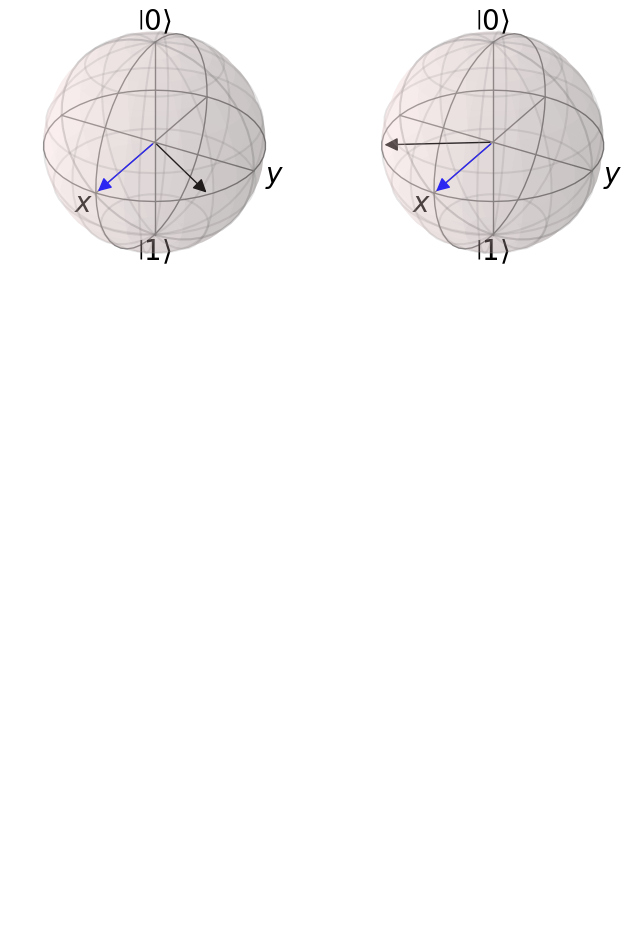

In [27]:
# CAMINHO DA ESFERA 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from qiskit.visualization.bloch import Bloch
from sympy.physics.matrices import msigma
from sympy.physics.quantum.dagger import Dagger
from sympy import Matrix
from sympy import I, N, re, exp, sin, cos, sqrt, pi, eye
import numpy as np

def cartesian_to_spherical(vec):
    x = np.real(vec[0])
    y = np.real(vec[1])
    z = np.real(vec[2])
    hxy = np.hypot(x, y)
    r = np.hypot(hxy, z)
    ϕ = np.arctan2(y, x) #az
    θ = np.arctan2(hxy, z) #el
    return [r, ϕ, θ]

def qubitmatrix_to_cartesian(M_q):
    M_q = N(M_q)
    q_1 = re((M_q[0,1] + M_q[1,0]) / 2)
    q_2 = re((M_q[0,1] - M_q[1,0]) / 2*I)
    q_3 = re(M_q[0,0])
    return np.array([q_1, q_2, q_3], dtype=np.float64)

def get_gradient_colors(rgb, n):
    red=rgb[0] 
    yel=rgb[1]
    blu=rgb[2]
    result = [colors.to_hex([red,yel,blu])]
    cr = red/n
    cy = yel/n
    cb = blu/n
    for i in range(n):
        if(red!=0):
            red -= cr 
        if(yel!=0):
            yel -= cy
        if(blu!=0):
            blu -= cb
        result.append(colors.to_hex([red,yel,blu]))
    return result

def rn_su2_euler(vec, rx, ry, rz):
    spherical_vec = cartesian_to_spherical(vec)
    ϕ = spherical_vec[1]
    θ = spherical_vec[2]
    sx = msigma(1)
    sy = msigma(2)
    sz = msigma(3)
    M_q = (np.sin(θ)*np.cos(ϕ)*sx + np.sin(θ)*np.sin(ϕ)*sy + np.cos(θ)*sz)
    U_n = Matrix([[exp(-I*(rx+rz)/2)*cos(ry/2), -exp(-I*(rx-rz)/2)*sin(ry/2)], [exp(I*(rx-rz)/2)*sin(ry/2), exp(I*(rx+rz)/2)*cos(ry/2)]])
    M_q_rotated = U_n*M_q*Dagger(U_n)
    return M_q_rotated

fig, ax = plt.subplots(figsize = [8, 12], nrows=3, ncols=2)
fig.patch.set_facecolor('white')
[axis.set_axis_off() for axis in ax.ravel()]

#rotations = [[-pi/8, 0, 0], [0, -pi/8, 0], [0, 0, -pi/8], [-pi/8, -pi/8, 0], [0, -pi/8, -pi/8], [-pi/8, 0, -pi/8], [-pi/8, -pi/8, -pi/8]]
rotations = [[1, 0, 0] , [-1, 0, 0]]
start_vec = [1, 0, 0]
num_iterations = 1

for m, rotation in enumerate(rotations):
    ax = fig.add_subplot(320+(m+1), axes_class = Axes3D)
    
    rot_x = rotation[0]
    rot_y = rotation[1]
    rot_z = rotation[2]
    _bloch = Bloch(axes=ax)
    _bloch.vector_color = get_gradient_colors([0, 0, 1], num_iterations)
    _bloch.vector_width = 1
    sv = []
    vec = start_vec
    sv.append(vec)
    for i in range(num_iterations):
        M_q_rotated = rn_su2_euler(vec, rot_x, rot_y, rot_z)
        vec = qubitmatrix_to_cartesian(M_q_rotated)
        sv.append(vec)

    _bloch.add_vectors(sv)
    _bloch.render()

In [28]:
#rotations = [[0, 0, pi/8], [0, 0, -pi/8], [0, pi/8, 0], [0, -pi/8, 0], [0, pi/8, pi/8], [0, -pi/8, -pi/8]]
# z, y, x REGRA DA MAO DIREITA
rotations = [[0, 0, pi/8]]
#z y y
start_vec = [1, 0, 0]
num_iterations = 8
trace(start_vec, rotations, num_iterations)    

NameError: name 'trace' is not defined

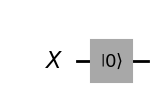

In [29]:
X = QuantumRegister(1, "X")
#Y = QuantumRegister(1, "Y")
circuit = QuantumCircuit(X)
circuit.reset(X)
#circuit.x(X)

display(circuit.draw(output="mpl"))
#display(Operator.from_circuit(circuit).draw("latex"))

In [30]:
from qiskit import QuantumCircuit
from math import sqrt
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(1)
qc.h(0)
# qc.h(1)
# qc.cx(1, 2)
qc.measure_all()  

qc.remove_final_measurements()  
statevector = Statevector(qc)
print(statevector)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


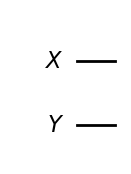

<IPython.core.display.Latex object>

In [31]:
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
circuit = QuantumCircuit(X, Y)
#circuit.x(X)
#circuit.h(Y)
#circuit.h(X)
#circuit.cx(Y, X)

display(circuit.draw(output="mpl"))
display(Operator.from_circuit(circuit).draw("latex"))

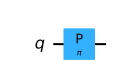

<IPython.core.display.Latex object>

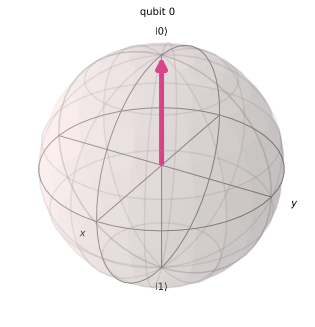

In [66]:
#X = QuantumRegister(1, "X")
#Y = QuantumRegister(1, "Y")
circuit = QuantumCircuit(1)
#circuit.h(1)

#circuit.x(1)
#circuit.cu(0, 1)
#circuit.u(0)
#circuit.cy(1,0)
#circuit.cz(1,0)
circuit.p(math.pi, 0)
#circuit.r(math.pi/2, math.pi/2, 0, 1)
#circuit.unitary(0)

#circuit.h(0)
#circuit.p(math.pi/2, 0)
#circuit.rx(math.pi/3, X)
#circuit.cx(Y, X)

display(circuit.draw(output="mpl"))
display(Operator.from_circuit(circuit).draw("latex"))
plot_bloch_multivector(circuit)

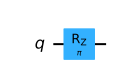

<IPython.core.display.Latex object>

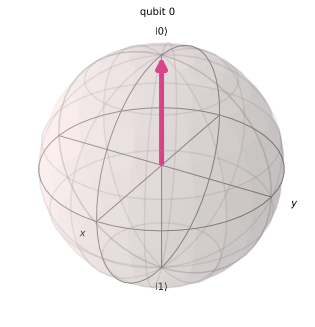

In [68]:
#X = QuantumRegister(1, "X")
#Y = QuantumRegister(1, "Y")
circuit = QuantumCircuit(1)
#circuit.h(1)

#circuit.x(1)
#circuit.cu(0, 1)
#circuit.u(0)
#circuit.cy(1,0)
#circuit.cz(1,0)
circuit.rz(math.pi, 0)
#circuit.r(math.pi/2, math.pi/2, 0, 1)
#circuit.unitary(0)

#circuit.h(0)
#circuit.p(math.pi/2, 0)
#circuit.rx(math.pi/3, X)
#circuit.cx(Y, X)

display(circuit.draw(output="mpl"))
display(Operator.from_circuit(circuit).draw("latex"))
plot_bloch_multivector(circuit)

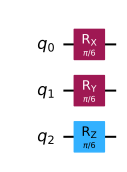

<IPython.core.display.Latex object>

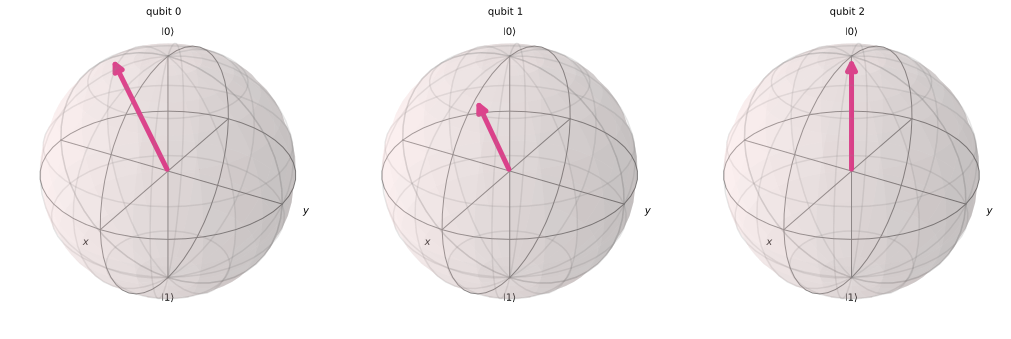

In [72]:
#X = QuantumRegister(1, "X")
#Y = QuantumRegister(1, "Y")
circuit = QuantumCircuit(3)
#circuit.h(1)

#circuit.x(1)
#circuit.cu(0, 1)
#circuit.u(0)
#circuit.cy(1,0)
#circuit.cz(1,0)
circuit.rx(math.pi/6, 0)
circuit.ry(math.pi/6, 1)
circuit.rz(math.pi/6, 2)
#circuit.r(math.pi/2, math.pi/2, 0, 1)
#circuit.unitary(0)

#circuit.h(0)
#circuit.p(math.pi/2, 0)
#circuit.rx(math.pi/3, X)
#circuit.cx(Y, X)

display(circuit.draw(output="mpl"))
display(Operator.from_circuit(circuit).draw("latex"))
plot_bloch_multivector(circuit)

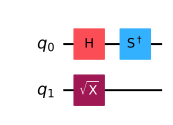

<IPython.core.display.Latex object>

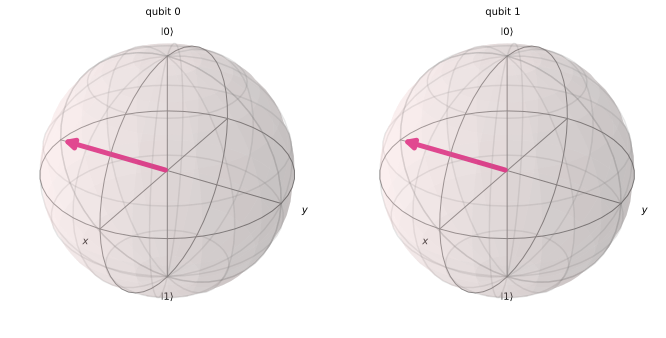

In [75]:
#X = QuantumRegister(1, "X")
#Y = QuantumRegister(1, "Y")
circuit = QuantumCircuit(2)
#circuit.h(1)

#circuit.x(1)
#circuit.cu(0, 1)
#circuit.u(0)
#circuit.cy(1,0)
#circuit.cz(1,0)
circuit.h(0)
circuit.sdg(0)
circuit.sx(1)
#circuit.r(math.pi/2, math.pi/2, 0, 1)
#circuit.unitary(0)

#circuit.h(0)
#circuit.p(math.pi/2, 0)
#circuit.rx(math.pi/3, X)
#circuit.cx(Y, X)

display(circuit.draw(output="mpl"))
display(Operator.from_circuit(circuit).draw("latex"))
plot_bloch_multivector(circuit)

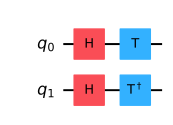

<IPython.core.display.Latex object>

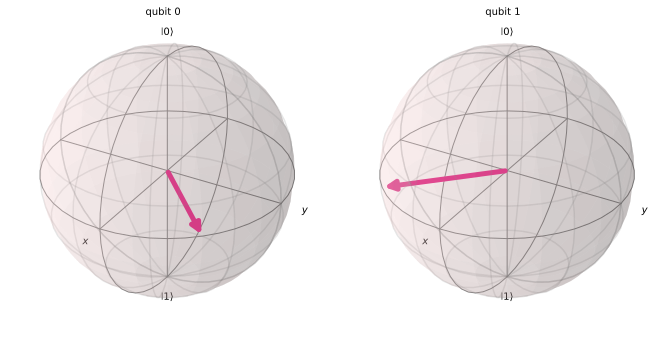

In [74]:
#X = QuantumRegister(1, "X")
#Y = QuantumRegister(1, "Y")
circuit = QuantumCircuit(2)
#circuit.h(1)

#circuit.x(1)
#circuit.cu(0, 1)
#circuit.u(0)
#circuit.cy(1,0)
#circuit.cz(1,0)
circuit.h(0)
circuit.t(0)
circuit.h(1)
circuit.tdg(1)
#circuit.r(math.pi/2, math.pi/2, 0, 1)
#circuit.unitary(0)

#circuit.h(0)
#circuit.p(math.pi/2, 0)
#circuit.rx(math.pi/3, X)
#circuit.cx(Y, X)

display(circuit.draw(output="mpl"))
display(Operator.from_circuit(circuit).draw("latex"))
plot_bloch_multivector(circuit)

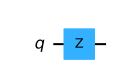

<IPython.core.display.Latex object>

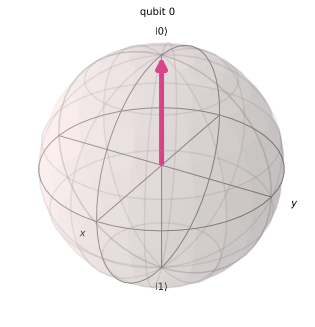

In [70]:
#X = QuantumRegister(1, "X")
#Y = QuantumRegister(1, "Y")
circuit = QuantumCircuit(1)
#circuit.h(1)

#circuit.x(1)
#circuit.cu(0, 1)
#circuit.u(0)
#circuit.cy(1,0)
#circuit.cz(1,0)
circuit.z (0)
#circuit.r(math.pi/2, math.pi/2, 0, 1)
#circuit.unitary(0)

#circuit.h(0)
#circuit.p(math.pi/2, 0)
#circuit.rx(math.pi/3, X)
#circuit.cx(Y, X)

display(circuit.draw(output="mpl"))
display(Operator.from_circuit(circuit).draw("latex"))
plot_bloch_multivector(circuit)

In [33]:
import sk_dsp_comm.sigsys as ss
import scipy.signal as signal
from IPython.display import Image, SVG

In [34]:
pip install scikit-dsp-comm==0.0.3

Note: you may need to restart the kernel to use updated packages.


In [35]:
import numpy as np

def rect(x, B):
    """
    create a rectangle function
    returns a numpy array that is 1 if |x| < w and 0 if |x| > w
    w is the rectangle width centered at 0
    x is the number of points in the array
    """
    
    B = int(B)
    x = int(x)
    
    high = np.ones(B)
    low1 = np.zeros(int(x/2 - B/2))    
    x1 = np.append(low1, high)
    rect = np.append(x1, low1)
    
    if x > len(rect):
        rect = np.append(rect, 0)
    elif x < len(rect):
        rect = rect[:-1]

    return rect

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
from IPython import display as disp

import ipywidgets as widgets
from IPython.display import display
slide = widgets.IntSlider()
display(slide)

from IPython.display import display
button = widgets.Button(description="update plot")
display(button)

pi = np.pi
length = 2000
x = np.linspace(-1, 1, length)

def on_button_clicked(b):
    """
    excecutes function when button is clicked
    """
    B = slide.value * 10
    if B == 0:
        B = 10
    plt.rcParams.update({'font.size': 14})
    plt.rcParams['figure.figsize'] = (12, 1.9)
    plt.yticks([0, 1], ['$0$', '$1$'])
    plt.xticks([-1*B/length, 1*B/length], ['$-B/2$', '$B/2$'])
    plt.plot(x, rect(len(x), B), label=r'$f(x)=rect_B(x)$')
    plt.axhline(0, color='black', lw=1)
    leg = plt.legend(loc='best', fontsize=14, fancybox=True)
    leg.get_frame().set_linewidth(0.1)
    plt.xlabel('$x$')
    plt.ylim(-0.2, 1.2)
    plt.show()
    
    plt.yticks([0, 1], ['$0$', '$1$'])
    plt.xticks([-1*pi, 0, 1*pi], ['$-B/2$', '$0$', '$B/2$'])

    k = np.linspace(-1, 1, length)
    plt.plot(x, (B / length) * np.sin(k * B / 2) / (B * k / 2), 'r', label=r'$F(k)=B sinc(kB/2)$')
    plt.axhline(0, color='black', lw=1)
    leg = plt.legend(loc='best', fontsize=14, fancybox=True)
    leg.get_frame().set_linewidth(0.1)
    plt.xlabel('$k$')
    plt.xlim(-.25, .25)
    plt.show()
    disp.clear_output(wait=True)
 
button.on_click(on_button_clicked)

IntSlider(value=0)

Button(description='update plot', style=ButtonStyle())

Text(0, 0.5, '$20\\log_{10}|H(\\omega)| $')

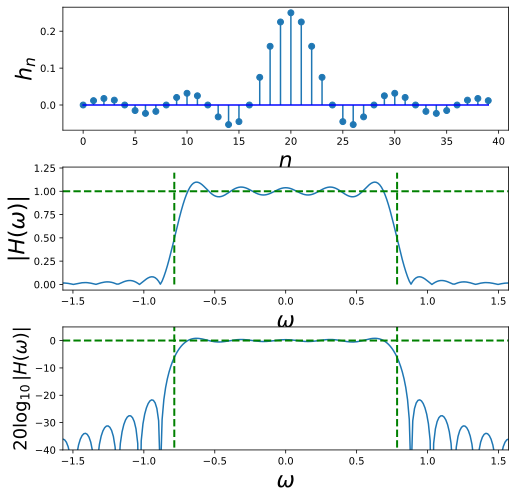

In [36]:
#calc_fft.py
from scipy import signal
from numpy import *
import matplotlib.pyplot as plt

wc = pi/4
M=20
N = 512 # DFT size
n = arange(-M,M)
h = wc/pi * sinc(wc*(n)/pi) # see definition of np.sinc()

w,Hh = signal.freqz(h,1,whole=True, worN=N) # get entire frequency domain
wx = fft.fftfreq(len(w)) # shift to center for plotting

fig,axs = plt.subplots(3,1)
fig.set_size_inches((8,8))
plt.subplots_adjust(hspace=0.3)
ax=axs[0]
ax.stem(n+M,h,basefmt='b-')
ax.set_xlabel("$n$",fontsize=22)
ax.set_ylabel("$h_n$",fontsize=22)

ax=axs[1]
ax.plot(w-pi,abs(fft.fftshift(Hh)))
ax.axis(xmax=pi/2,xmin=-pi/2)
ax.vlines([-wc,wc],0,1.2,color='g',lw=2.,linestyle='--',)
ax.hlines(1,-pi,pi,color='g',lw=2.,linestyle='--',)
ax.set_xlabel(r"$\omega$",fontsize=22)
ax.set_ylabel(r"$|H(\omega)| $",fontsize=22)

ax=axs[2]
ax.plot(w-pi,20*log10(abs(fft.fftshift(Hh))))
ax.axis(ymin=-40,xmax=pi/2,xmin=-pi/2)
ax.vlines([-wc,wc],10,-40,color='g',lw=2.,linestyle='--',)
ax.hlines(0,-pi,pi,color='g',lw=2.,linestyle='--',)
ax.set_xlabel(r"$\omega$",fontsize=22)
ax.set_ylabel(r"$20\log_{10}|H(\omega)| $",fontsize=18)

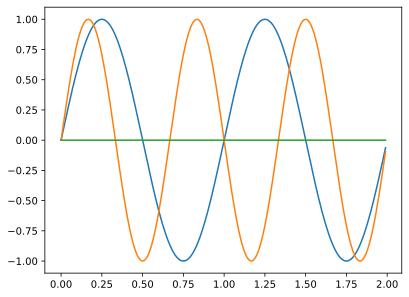

In [64]:
import numpy as np
f = 1  # Frequency, in cycles per second, or Hertz
f_s = 100  # Sampling rate, or number of measurements per second

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x = np.sin(f * 2 * np.pi * t)
y = np.sin((f * 3 * np.pi * t)) # * np.sin((f * 2 * np.pi * t))
#y = np.sin((f * 2 * np.pi * t) + np.pi / 2)
fig, ax = plt.subplots()
ax.plot(t, x)
ax.plot(t,y)
ax.plot(t,t-t)
#ax.plot(t, x*y)

#ax.set_xlabel('Time [s]')
#ax.set_ylabel('Signal amplitude');

(-5.0, 200.0)

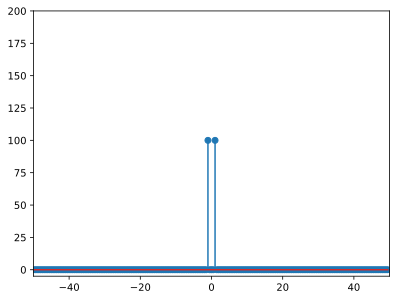

In [38]:
from scipy import fftpack

X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
#ax.set_xlabel('Frequency in Hertz [Hz]')
#ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 200)

In [39]:
!pip install qutip_qip

In [40]:
def _hamming_distance(x, bits=32):
    """
    Calculate the bit-wise Hamming distance of x from 0: That is, the number
    1s in the integer x.
    """
    tot = 0
    while x:
        tot += 1
        x &= x - 1
    return tot

def hadamard_transform(N=1):
    data = 2 ** (-N / 2) * np.array([[(-1) ** _hamming_distance(i & j)
                                      for i in range(2 ** N)]
                                     for j in range(2 ** N)])

    return Qobj(data, dims=[[2] * N, [2] * N])  
hadamard = hadamard_transform() 
hadamard.data.shape

NameError: name 'Qobj' is not defined

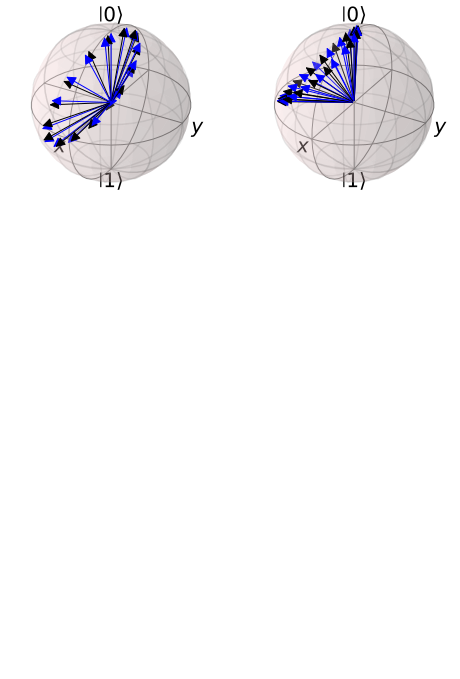

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from qiskit.visualization.bloch import Bloch
from sympy.physics.matrices import msigma
from sympy.physics.quantum.dagger import Dagger
from sympy import Matrix
from sympy import I, N, re, exp, sin, cos, sqrt, pi, eye
import numpy as np

def cartesian_to_spherical(vec):
    x = np.real(vec[0])
    y = np.real(vec[1])
    z = np.real(vec[2])
    hxy = np.hypot(x, y)
    r = np.hypot(hxy, z)
    θ = np.arctan2(hxy, z) #el
    ϕ = np.arctan2(y, x) #az
    return [r, θ, ϕ]

def qubitmatrix_to_cartesian(M_q):
    M_q = N(M_q)
    q_1 = re((M_q[0,1] + M_q[1,0]) / 2)
    q_2 = re((M_q[0,1] - M_q[1,0]) / 2*I)
    q_3 = re(M_q[0,0])
    return np.array([q_1, q_2, q_3], dtype=np.float64)

def get_gradient_colors(rgb, n):
    red=rgb[0] 
    yel=rgb[1]
    blu=rgb[2]
    result = [colors.to_hex([red,yel,blu])]
    cr = red/n
    cy = yel/n
    cb = blu/n
    for i in range(n):
        if(red!=0):
            red -= cr 
        if(yel!=0):
            yel -= cy
        if(blu!=0):
            blu -= cb
        result.append(colors.to_hex([red,yel,blu]))
    return result

def rn_su2_euler(vec, rx, ry, rz):
    spherical_vec = cartesian_to_spherical(vec)
    θ = spherical_vec[1]
    ϕ = spherical_vec[2]
    sx = msigma(1)
    sy = msigma(2)
    sz = msigma(3)
    M_q = sin(θ)*cos(ϕ)*sx + sin(θ)*sin(ϕ)*sy + cos(θ)*sz
    U_n = Matrix([[exp(-I*(rx+rz)/2)*cos(ry/2), -exp(-I*(rx-rz)/2)*sin(ry/2)], [exp(I*(rx-rz)/2)*sin(ry/2), exp(I*(rx+rz)/2)*cos(ry/2)]])
    M_q_rotated = U_n*M_q*Dagger(U_n)
    return M_q_rotated

fig, ax = plt.subplots(figsize = [8, 12], nrows=3, ncols=2)
fig.patch.set_facecolor('white')
[axis.set_axis_off() for axis in ax.ravel()]

#rotations = [[0, 0, pi/8], [0, 0, -pi/8], [0, pi/8, 0], [0, -pi/8, 0], [0, pi/8, pi/8], [0, -pi/8, -pi/8]]
# 
rotations = [[0, -pi/4, pi/11],[pi/8, -pi/8, 0]]
# x, y, z
start_vec = [0, 0, 1]
num_iterations = 32

for m, rotation in enumerate(rotations):
    ax = fig.add_subplot(320+(m+1), axes_class = Axes3D)
    
    rot_x = rotation[0]
    rot_y = rotation[1]
    rot_z = rotation[2]
    _bloch = Bloch(axes=ax)
    _bloch.vector_color = get_gradient_colors([0, 0, 1], 1) #num_iterations)
    _bloch.vector_width = 1
    sv = []
    vec = start_vec
    sv.append(vec)
    for i in range(num_iterations):
        M_q_rotated = rn_su2_euler(vec, rot_x, rot_y, rot_z)
        vec = qubitmatrix_to_cartesian(M_q_rotated)
        sv.append(vec)

    _bloch.add_vectors(sv)
    _bloch.render()

[0. 0. 1.]


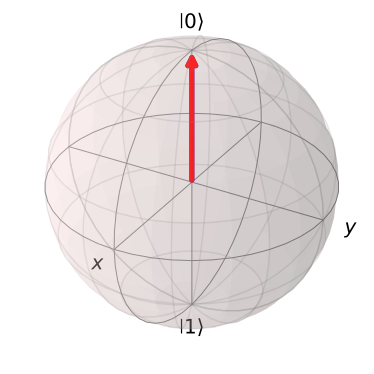

In [42]:
def qubitmatrix_to_cartesian(M_q):
    M_q = N(M_q)
    q_1 = re((M_q[0,1] + M_q[1,0]) / 2)
    q_2 = re((M_q[0,1] - M_q[1,0]) / 2*I)
    q_3 = re(M_q[0,0])
    return np.array([q_1, q_2, q_3], dtype=np.float64)

# perform a single rotation:
rot_x = pi/3
rot_y = 0
rot_z = 0

start_vec = [0, 0, 1]

_bloch = Bloch()
_bloch.vector_color = ['blue', 'red']

sv = []
vec = start_vec
sv.append(vec)

vec = qubitmatrix_to_cartesian(rn_su2_euler(vec, rot_x, rot_y, rot_z))
print(vec)
sv.append(vec)

_bloch.add_vectors(sv)
_bloch.render()

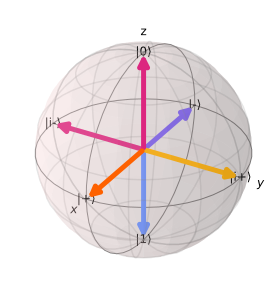

In [43]:
# ESTE FUNCIONA, MAS É UM A UM - USAR NA EXLICAÇÃO DO CAPÍTULO 1
from qiskit.visualization.bloch import Bloch

bloch_states = {
    "|0⟩": [0, 0, 1],
    "|1⟩": [0, 0, -1],
    "|+⟩": [1, 0, 0],
    "|-⟩": [-1, 0, 0],
    "|i+⟩": [0, 1, 0],
    "|i-⟩": [0, -1, 0]
}

def plot_bloch_multiple_vector(bloch_states, title='Bloch Sphere', font_size=12):
    fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))


    B = Bloch(axes=ax, font_size=font_size)
    B.zlabel = ['z', '']

    for key, value in bloch_states.items():
        B.add_vectors([value])
        B.add_annotation(value, key)
        
    B.render(title=title)


plot_bloch_multiple_vector(bloch_states, title=' ', font_size=12)

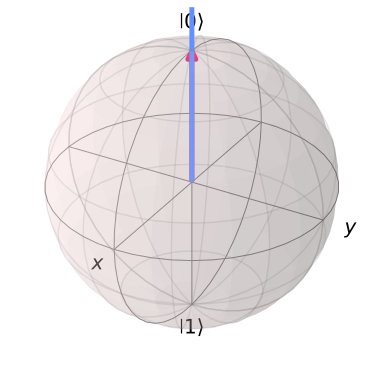

In [44]:
b = Bloch()
xp = [np.cos(th) for th in np.linspace(0, 3.141516, 10)]
yp = [np.sin(th) for th in np.linspace(0, 3.141516, 10)]
zp = zp = np.zeros(10)
pnts = [xp, yp, zp]
#b.add_points(pnts)
#vec = [[1,0,0],[0,1,0],[0,0,3.141516/3]]
vec = [[0,0,3.141516/3], [0,0,3.141516/3 + math.pi]]
b.add_vectors(vec)
b.show()

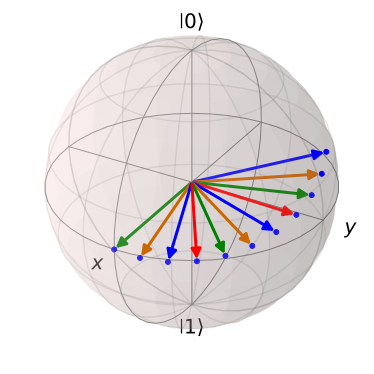

In [45]:
def to_spherical(state):
    r0 = np.abs(state[0])
    ϕ0 = np.angle(state[0])
    r1 = np.abs(state[1])
    ϕ1 = np.angle(state[1])
    r = np.sqrt(r0 ** 2 + r1 ** 2)
    θ = 2 * np.arccos(r0 / r)
    ϕ = ϕ1 - ϕ0
    return [r, θ, ϕ]

def to_cartesian(polar):
    r = polar[0]
    θ = polar[1]
    ϕ = polar[2]
    x = r * np.sin(θ) * np.cos(ϕ)
    y = r * np.sin(θ) * np.sin(ϕ)
    z = r * np.cos(θ)
    return [x, y, z]

import qutip as qt
from qutip.qip.operations import rx
import numpy as np

def rn_so3(state, theta, phi, delta):
    rn_mat = qt.Qobj(
        [[np.cos(delta/2) - (0+1j)*np.cos(theta)*np.sin(delta/2),
          -(0+1j)*np.exp(-(0+1j)*phi)*np.sin(delta/2)*np.sin(theta)],
         [-(0+1j)*np.exp((0+1j)*phi)*np.sin(delta/2)*np.sin(theta),
          np.cos(delta/2) + (0+1j)*np.cos(theta)*np.sin(delta/2)]]
        )
    r_state = (rn_mat*state)*(rn_mat*state).dag()
    return(r_state)

b = qt.Bloch()
b.clear()
b.make_sphere()

states = []
points = []

alpha = 1/np.sqrt(2)
beta = 1/np.sqrt(2)
s = np.array([alpha,beta])
state = qt.Qobj(s)
states.append(state)

Ψ = [complex(alpha, 0), complex(beta, 0)]
polar = to_spherical(Ψ)
pnt = to_cartesian(polar)
points.append(pnt)

rotated = state
for i in range(0,10):
    rotated = rn_so3(rotated, 0.4, 0.3, 0.2)
    pnt = [(qt.sigmax()*rotated).tr(), (qt.sigmay()*rotated).tr(), (qt.sigmaz()*rotated).tr()]
    states.append(rotated)
    points.append(pnt)

b.add_states(states)
np_points = np.array(points)
b.add_points([np_points[:,0], np_points[:,1], np_points[:,2]])
b.show()

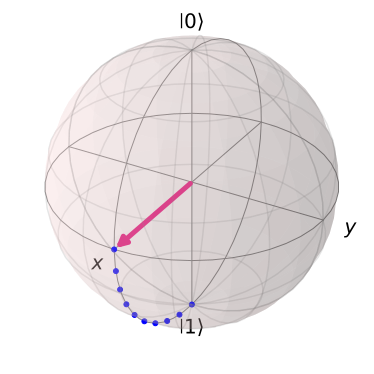

In [46]:
b = Bloch()
#pnt = [1/np.sqrt(3),1/np.sqrt(3),1/np.sqrt(3)]
#b.add_points(pnt)
vec = [1,0,0]
b.add_vectors(vec)
cnt = 10
xp = [np.cos(th) for th in np.linspace(0, -3.1415/2, cnt)]
yp = np.zeros(cnt)
zp = [np.sin(th) for th in np.linspace(0, -3.1415/2, cnt)]
pnts = [xp, yp, zp]
b.add_points(pnts)
b.show()

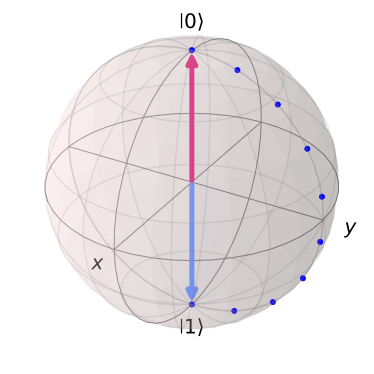

In [47]:
b = Bloch()
#pnt = [1/np.sqrt(3),1/np.sqrt(3),1/np.sqrt(3)]
#b.add_points(pnt)
vec = [[0,0,1], [0,0,-1]]
b.add_vectors(vec)
cnt = 10
xp = np.zeros(cnt)
yp = [np.sin(th) for th in np.linspace(0, 3.1415, cnt)]
zp = [np.cos(th) for th in np.linspace(0, 3.1415, cnt)]
pnts = [xp, yp, zp]
b.add_points(pnts)
b.show()

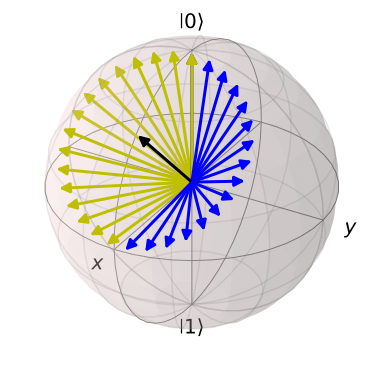

In [48]:
#hadamard from 0 
from qutip import *
import numpy as np
import scipy
import matplotlib.colors
import scipy
import scipy as sp
from scipy.linalg import logm, expm

def _hamming_distance(x, bits=32):
    """
    Calculate the bit-wise Hamming distance of x from 0: That is, the number
    1s in the integer x.
    """
    tot = 0
    while x:
        tot += 1
        x &= x - 1
    return tot

def hadamard_transform(N=1):
    data = 2 ** (-N / 2) * np.array([[(-1) ** _hamming_distance(i & j)
                                      for i in range(2 ** N)]
                                     for j in range(2 ** N)])
    return data

#the gate
hadamard = hadamard_transform() 

# the hamilton operator describing the evolution during the hadamard gate
hamilton = Qobj(logm(hadamard)) / np.pi * 1.j

#create initial state vector
psi0 = (basis(2, 0)).unit()

# describing the gate as time evolution
def gate(t):
    return (-2*np.pi*1.j*hamilton*t).expm()

# evolve the gate
n = 16
psi = [gate(t)*psi0 for t in np.linspace(0, 1., 2*n)]

# plotting the states. State evolution during the first hamadard gate is yellow. During second hadamard gate is blue
b = Bloch()
b.vector_color = [matplotlib.colors.to_rgba('y', alpha=i) for i in np.arange(n)/float(n)] + [matplotlib.colors.to_rgba('b', alpha=i) for i in np.arange(n)/float(n)]  + ['black']
b.add_states(psi)
b.add_states([(basis(2,0) + (basis(2,0) + basis(2,1)).unit()).unit()])

b.show()

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[2.]
 [1.]]
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.37139068]
 [-0.92847669]]


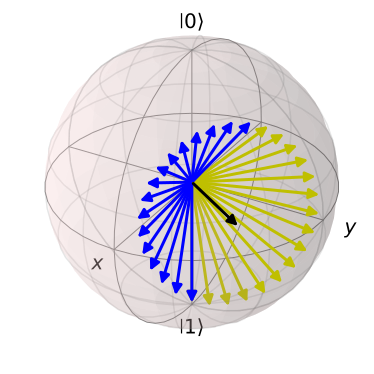

In [49]:
#hadamard from 1
from qutip import *
import numpy as np
import scipy
import matplotlib.colors
import scipy
import scipy as sp
from scipy.linalg import logm, expm

def _hamming_distance(x, bits=32):
    """
    Calculate the bit-wise Hamming distance of x from 0: That is, the number
    1s in the integer x.
    """
    tot = 0
    while x:
        tot += 1
        x &= x - 1
    return tot

def hadamard_transform(N=1):
    data = 2 ** (-N / 2) * np.array([[(-1) ** _hamming_distance(i & j)
                                      for i in range(2 ** N)]
                                     for j in range(2 ** N)])
    return data

#the gate
hadamard = hadamard_transform() 

# the hamilton operator describing the evolution during the hadamard gate
hamilton = Qobj(logm(hadamard)) / np.pi * 1.j

#create initial state vector
psi0 = (basis(2, 1)).unit()

# describing the gate as time evolution
def gate(t):
    return (-2*np.pi*1.j*hamilton*t).expm()

# evolve the gate
n = 16
psi = [gate(t)*psi0 for t in np.linspace(0, 1., 2*n)]

# plotting the states. State evolution during the first hamadard gate is yellow. During second hadamard gate is blue
b = Bloch()
b.vector_color = [matplotlib.colors.to_rgba('y', alpha=i) for i in np.arange(n)/float(n)] + [matplotlib.colors.to_rgba('b', alpha=i) for i in np.arange(n)/float(n)]  + ['black']
b.add_states(psi)
var1 = basis(2,0) + (basis(2,0) + basis(2,1))
var1.unit().unit()
print(var1)
var2 = (var1 - 12*psi0/2).unit()
print(var2)
b.add_states([var2]) 
b.show()

In [50]:
from optparse import OptionParser
import inspect
qc = QuantumCircuit(2)
members = inspect.getmembers(qc, predicate=inspect.ismethod)
for p in members:
    #print(p)
    print(p[0], inspect.getfullargspec(p[1]).args)

__and__ ['self', 'rhs']
__deepcopy__ ['self', 'memo']
__eq__ ['self', 'other']
__getitem__ ['self', 'item']
__iand__ ['self', 'rhs']
__init__ ['self']
__ixor__ ['self', 'top']
__len__ ['self']
__str__ ['self']
__xor__ ['self', 'top']
_append ['self', 'instruction', 'qargs', 'cargs']
_append_standard_gate ['self', 'op', 'qargs', 'params', 'label']
_cbit_argument_conversion ['self', 'clbit_representation']
_check_dups ['self', 'qubits']
_cls_instances ['cls']
_cls_prefix ['cls']
_create_creg ['self', 'length', 'name']
_create_qreg ['self', 'length', 'name']
_current_scope ['self']
_from_circuit_data ['cls', 'data', 'add_regs', 'name']
_increment_instances ['cls']
_name_update ['self']
_peek_previous_instruction_in_scope ['self']
_pop_previous_instruction_in_scope ['self']
_pop_scope ['self']
_prepare_new_stretch ['self', 'name_or_stretch']
_prepare_new_var ['self', 'name_or_var', 'type_']
_push_scope ['self', 'qubits', 'clbits', 'registers', 'allow_jumps', 'forbidden_message']
_qbit_argu

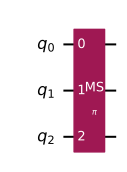

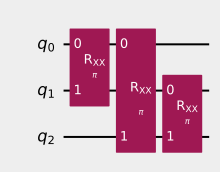

In [51]:
#X = QuantumRegister(1, "X")
#Y = QuantumRegister(1, "Y")
circuit = QuantumCircuit(3)
#circuit.h(1)

#circuit.cz(0,1)
#circuit.cu(0, 1)
circuit.ms(math.pi, [0,1,2])
#circuit.cy(1,0)
#circuit.cz(1,0)
#circuit.cu(math.pi,math.pi,math.pi, math.pi, 0, 1)
#circuit.r(math.pi/2, math.pi/2, 0, 1)
#circuit.unitary(0)

#circuit.h(0)
#circuit.p(math.pi/2, 0)
#circuit.rx(math.pi/3, X)
#circuit.cx(Y, X)

display(circuit.draw(output="mpl"))
#display(Operator.from_circuit(circuit).draw("latex"))
circuit.decompose().draw (output='mpl', style={'backgroundcolor': '#EEEEEE'})
#plot_bloch_multivector(circuit)

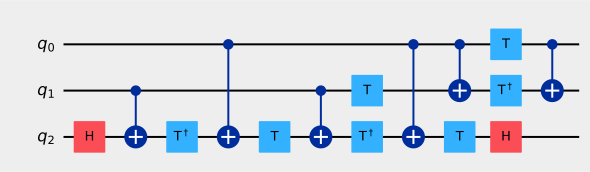

In [52]:
qc = QuantumCircuit (3)
qc.h (2)
qc.cx (1,2)
qc.tdg(2)
qc.cx(0,2)
qc.t(2)
qc.cx(1,2)
qc.t(1)
qc.tdg(2)
qc.cx(0,2)
qc.cx(0,1)
qc.t(2)
qc.t(0)
qc.tdg(1)
qc.h(2)
qc.cx(0,1)
qc.draw (output='mpl', style={'backgroundcolor': '#EEEEEE'})

{'0011': 503, '0100': 521}


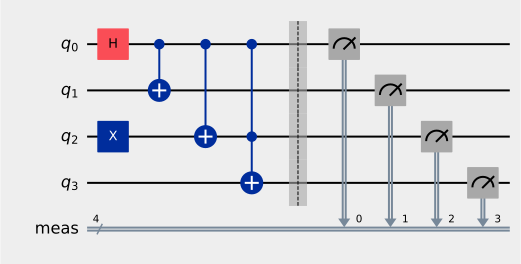

In [53]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumCircuit

circ = QuantumCircuit(4)
circ.h(0)
circ.cx(0,1)
circ.x(2)
circ.cx(0,2)
circ.ccx(0,2,3)
circ.measure_all()

simulator = BasicSimulator()
result = simulator.run(circ).result()
counts = result.get_counts()
print(counts)
circ.draw (output='mpl', style={'backgroundcolor': '#EEEEEE'})

In [54]:
from qiskit.qasm3 import *
qc = QuantumCircuit(2) 
qc.x(0)
qc.measure_all()
simulator = BasicSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})
dumps(qc)

{'01': 1024}


'OPENQASM 3.0;\ninclude "stdgates.inc";\nbit[2] meas;\nqubit[2] q;\nx q[0];\nbarrier q[0], q[1];\nmeas[0] = measure q[0];\nmeas[1] = measure q[1];\n'

{'0101': 541, '0010': 483}


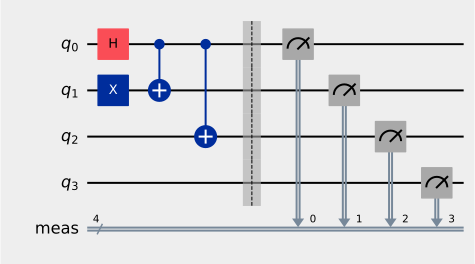

In [55]:
qc = QuantumCircuit(4) 
qc.h(0)
qc.x(1)
qc.cx(0,1)
qc.cx(0,2)
qc.measure_all()
simulator = BasicSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

{'10': 521, '11': 503}


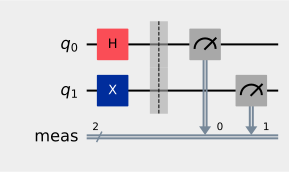

In [56]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumCircuit

circ = QuantumCircuit(2)
circ.h(0)
circ.x(1)
circ.measure_all()

simulator = BasicSimulator()
result = simulator.run(circ).result()
counts = result.get_counts()
print(counts)
circ.draw (output='mpl', style={'backgroundcolor': '#EEEEEE'})

{'11': 1024}


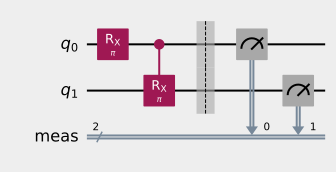

In [57]:
from qiskit import *
from qiskit.circuit import * 

phi = Parameter('phi')
circ = QuantumCircuit(2)
circ.rx(phi, 0)
circ.crx(phi, 0, 1)
circ_param = circ.assign_parameters({phi: math.pi})
circ_param.measure_all()

simulator = BasicSimulator()
result = simulator.run(circ_param).result()
counts = result.get_counts()
print(counts)
circ_param.draw (output='mpl', style={'backgroundcolor': '#EEEEEE'})

In [58]:
from optparse import OptionParser
import inspect
qc = QuantumCircuit(2)
members = inspect.getmembers(qc, predicate=inspect.ismethod)
for p in members:
    #print(p)
    print(p[0], inspect.getfullargspec(p[1]).args)

__and__ ['self', 'rhs']
__deepcopy__ ['self', 'memo']
__eq__ ['self', 'other']
__getitem__ ['self', 'item']
__iand__ ['self', 'rhs']
__init__ ['self']
__ixor__ ['self', 'top']
__len__ ['self']
__str__ ['self']
__xor__ ['self', 'top']
_append ['self', 'instruction', 'qargs', 'cargs']
_append_standard_gate ['self', 'op', 'qargs', 'params', 'label']
_cbit_argument_conversion ['self', 'clbit_representation']
_check_dups ['self', 'qubits']
_cls_instances ['cls']
_cls_prefix ['cls']
_create_creg ['self', 'length', 'name']
_create_qreg ['self', 'length', 'name']
_current_scope ['self']
_from_circuit_data ['cls', 'data', 'add_regs', 'name']
_increment_instances ['cls']
_name_update ['self']
_peek_previous_instruction_in_scope ['self']
_pop_previous_instruction_in_scope ['self']
_pop_scope ['self']
_prepare_new_stretch ['self', 'name_or_stretch']
_prepare_new_var ['self', 'name_or_var', 'type_']
_push_scope ['self', 'qubits', 'clbits', 'registers', 'allow_jumps', 'forbidden_message']
_qbit_argu

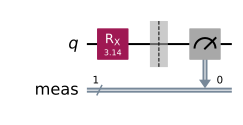

In [59]:
from qiskit.circuit import QuantumCircuit, Parameter
 
# create the parameter
phi = Parameter('phi')
qc = QuantumCircuit(1)
 
# parameterize the rotation
qc.rx(phi, 0)
qc.draw('mpl')
 
# bind the parameters after circuit to create a bound circuit
bc = qc.assign_parameters({phi: 3.14})
bc.measure_all()
bc.draw('mpl')

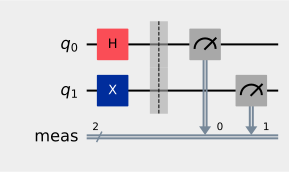

In [60]:
circ1 = QuantumCircuit(2)
circ1.h(0)

circ2 = QuantumCircuit(2)
circ2.x(1)

circfinal = circ1.compose(circ2)
circfinal.measure_all()

circfinal.draw (output='mpl', style={'backgroundcolor': '#EEEEEE'})


In [61]:
from optparse import OptionParser
import inspect
qc = QuantumCircuit(1)
members = inspect.getmembers(qc, predicate=inspect.ismethod)
for p in members:
    #print(p)
    print(p[0], inspect.getfullargspec(p[1]).args)

__and__ ['self', 'rhs']
__deepcopy__ ['self', 'memo']
__eq__ ['self', 'other']
__getitem__ ['self', 'item']
__iand__ ['self', 'rhs']
__init__ ['self']
__ixor__ ['self', 'top']
__len__ ['self']
__str__ ['self']
__xor__ ['self', 'top']
_append ['self', 'instruction', 'qargs', 'cargs']
_append_standard_gate ['self', 'op', 'qargs', 'params', 'label']
_cbit_argument_conversion ['self', 'clbit_representation']
_check_dups ['self', 'qubits']
_cls_instances ['cls']
_cls_prefix ['cls']
_create_creg ['self', 'length', 'name']
_create_qreg ['self', 'length', 'name']
_current_scope ['self']
_from_circuit_data ['cls', 'data', 'add_regs', 'name']
_increment_instances ['cls']
_name_update ['self']
_peek_previous_instruction_in_scope ['self']
_pop_previous_instruction_in_scope ['self']
_pop_scope ['self']
_prepare_new_stretch ['self', 'name_or_stretch']
_prepare_new_var ['self', 'name_or_var', 'type_']
_push_scope ['self', 'qubits', 'clbits', 'registers', 'allow_jumps', 'forbidden_message']
_qbit_argu

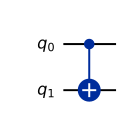

<IPython.core.display.Latex object>

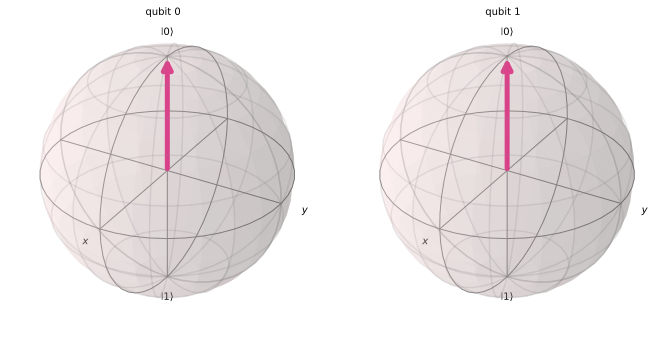

In [77]:
#X = QuantumRegister(1, "X")
#Y = QuantumRegister(1, "Y")
circuit = QuantumCircuit(2)
#circuit.h(1)

#circuit.x(1)
#circuit.cu(0, 1)
#circuit.u(0)
#circuit.cy(1,0)
#circuit.cz(1,0)
circuit.cx(0,1)
#circuit.r(math.pi/2, math.pi/2, 0, 1)
#circuit.unitary(0)

#circuit.h(0)
#circuit.p(math.pi/2, 0)
#circuit.rx(math.pi/3, X)
#circuit.cx(Y, X)

display(circuit.draw(output="mpl"))
display(Operator.from_circuit(circuit).draw("latex"))
plot_bloch_multivector(circuit)

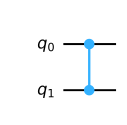

<IPython.core.display.Latex object>

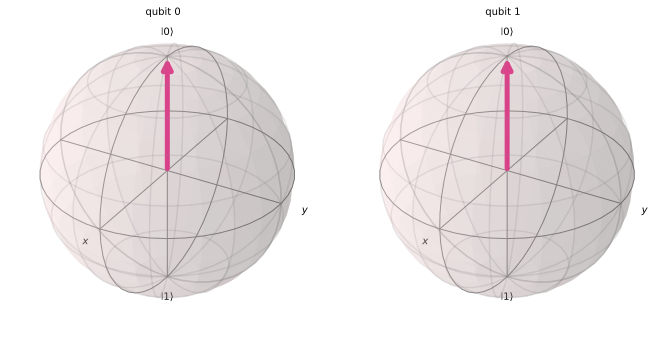

In [78]:
#X = QuantumRegister(1, "X")
#Y = QuantumRegister(1, "Y")
circuit = QuantumCircuit(2)
#circuit.h(1)

#circuit.x(1)
#circuit.cu(0, 1)
#circuit.u(0)
#circuit.cy(1,0)
#circuit.cz(1,0)
circuit.cz(0,1)
#circuit.r(math.pi/2, math.pi/2, 0, 1)
#circuit.unitary(0)

#circuit.h(0)
#circuit.p(math.pi/2, 0)
#circuit.rx(math.pi/3, X)
#circuit.cx(Y, X)

display(circuit.draw(output="mpl"))
display(Operator.from_circuit(circuit).draw("latex"))
plot_bloch_multivector(circuit)

{'0010': 531, '0101': 493}


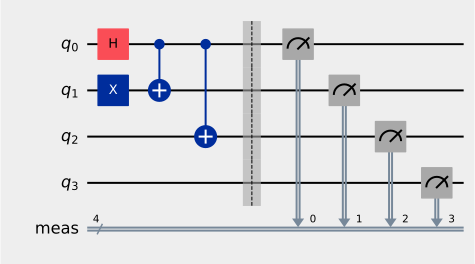

In [82]:
qc = QuantumCircuit(4)
qc.h(0)
qc.x(1)
qc.cx(0,1)
qc.cx(0,2)
qc.measure_all()
simulator = BasicSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)
qc.draw(output="mpl", style={'backgroundcolor': '#EEEEEE'})

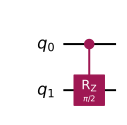

<IPython.core.display.Latex object>

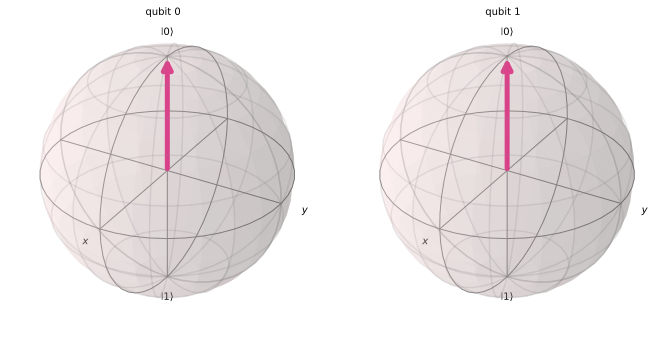

In [85]:
#X = QuantumRegister(1, "X")
#Y = QuantumRegister(1, "Y")
circuit = QuantumCircuit(2)
#circuit.h(1)

#circuit.x(1)
#circuit.cu(0, 1)
#circuit.u(0)
#circuit.cy(1,0)
#circuit.cz(1,0)
circuit.crz(math.pi/2, 0,1)
#circuit.r(math.pi/2, math.pi/2, 0, 1)
#circuit.unitary(0)

#circuit.h(0)
#circuit.p(math.pi/2, 0)
#circuit.rx(math.pi/3, X)
#circuit.cx(Y, X)

display(circuit.draw(output="mpl"))
display(Operator.from_circuit(circuit).draw("latex"))
plot_bloch_multivector(circuit)

{'00': 511, '11': 513}


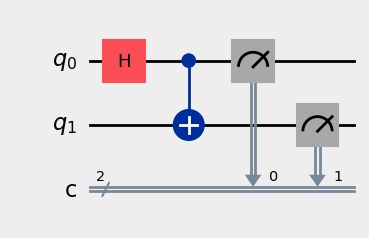

In [12]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure([0,1], [0,1])

simulator = BasicSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()

print(counts)
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

{'111': 501, '000': 523}


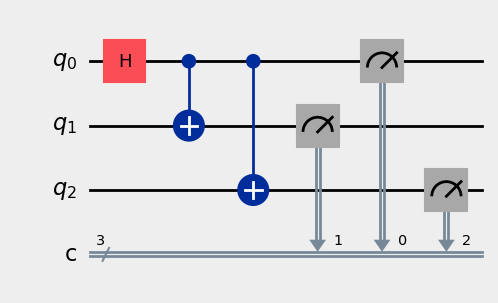

In [13]:
qc = QuantumCircuit(3,3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.measure([0,1,2], [0,1,2])

simulator = BasicSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()

print(counts)
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})